# Customer Segmentation Analysis

## Project Description
The aim of this data analytics project is to perform customer segmentation analysis for an e-commerce company. By analyzing customer behavior and purchase patterns, customers are grouped into distinct segments. This segmentation helps in targeted marketing, improving customer satisfaction, and enhancing business strategies.



## Learning Objectives
- Gain practical experience with clustering algorithms
- Perform data cleaning and exploratory data analysis
- Apply feature scaling and K-Means clustering
- Visualize customer segments
- Generate business insights and recommendations


## Import Required Libraries


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


## Data Collection
The dataset used in this project is sourced from Kaggle and contains customer demographic information, purchase history, and marketing campaign responses.


In [4]:
df = pd.read_csv("ifood_df.csv")
df.head()


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


## Dataset Overview
Understanding the structure and size of the dataset.


In [5]:
df.shape


(2205, 39)

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [7]:
df.describe()


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


## Data Cleaning
The dataset is already preprocessed:
- Missing values handled
- Categorical variables encoded
- New features engineered

Hence, no additional cleaning is required.


## Feature Selection for Segmentation
The following behavioral and demographic features are selected for clustering:
- Income
- Recency
- Total Spending
- Regular Product Spending
- Number of Children and Teenagers


In [8]:
features = [
    'Income',
    'Recency',
    'MntTotal',
    'MntRegularProds',
    'Kidhome',
    'Teenhome'
]

X = df[features]


## Feature Scaling
Standardization is applied to ensure all features contribute equally to clustering.


In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## Finding Optimal Number of Clusters (Elbow Method)
The Elbow Method helps determine the ideal number of clusters by analyzing WCSS values.


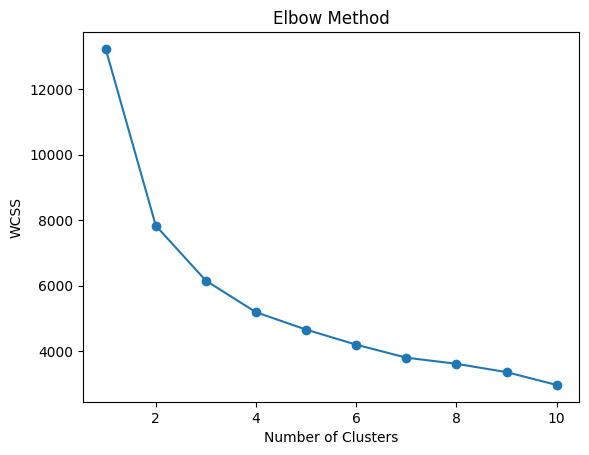

In [10]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()


## Customer Segmentation Using K-Means
Based on the Elbow Method, K = 4 clusters are selected.


In [11]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


## Visualization of Customer Segments
Visual representation of customer clusters based on Income and Total Spending.


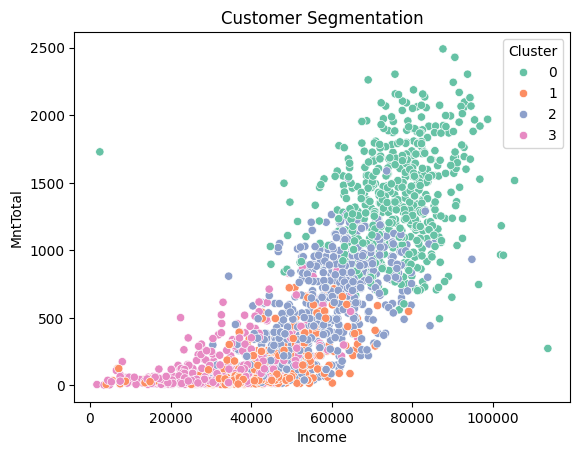

In [12]:
sns.scatterplot(
    x=df['Income'],
    y=df['MntTotal'],
    hue=df['Cluster'],
    palette='Set2'
)
plt.title("Customer Segmentation")
plt.show()


## Cluster Characteristics
Analyzing average values of features within each cluster.


In [13]:
df.groupby('Cluster')[features].mean()


,Income,Recency,MntTotal,MntRegularProds,Kidhome,Teenhome
Cluster,,,,,,
0,76080.287273,49.816364,1365.467273,1292.403636,0.058182,0.123636
1,42187.920398,49.166667,149.014925,128.303483,1.064677,1.039801
2,57242.296296,48.769726,574.624799,519.209340,0.022544,1.012882
3,30815.745253,48.441456,115.732595,93.229430,0.792722,0.003165


## Insights
- Cluster 0 represents high-income and high-spending customers (Premium segment)
- Cluster 1 includes low-income and low-spending customers
- Cluster 2 contains recently active and moderately spending customers
- Cluster 3 shows high-income but low engagement customers


## Business Recommendations
- Introduce loyalty programs for premium customers
- Offer personalized discounts for budget customers
- Re-engage high-income but inactive customers through targeted campaigns
- Focus marketing efforts based on customer segment behavior


## Conclusion
Customer segmentation using K-Means clustering successfully identified distinct customer groups. These insights can be used to optimize marketing strategies, improve customer retention, and increase overall business performance.
